In [ ]:
# https://huggingface.co/docs/diffusers/en/using-diffusers/sdxl_turbo


In [2]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipeline = pipeline.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

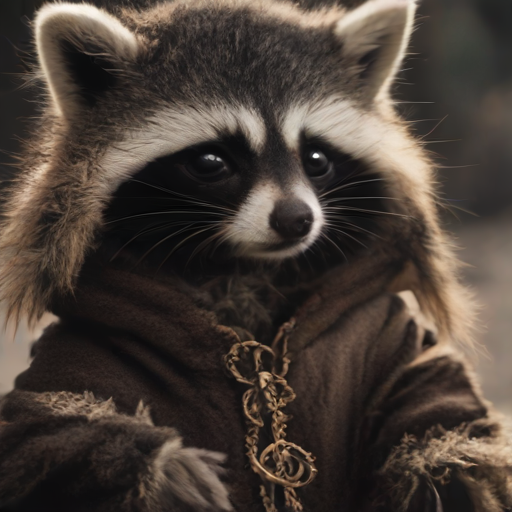

In [4]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline_text2image = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipeline_text2image = pipeline_text2image.to("cuda")

prompt = "A cinematic shot of a baby racoon wearing an intricate italian priest robe."

image = pipeline_text2image(prompt=prompt, guidance_scale=0.0, num_inference_steps=1).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

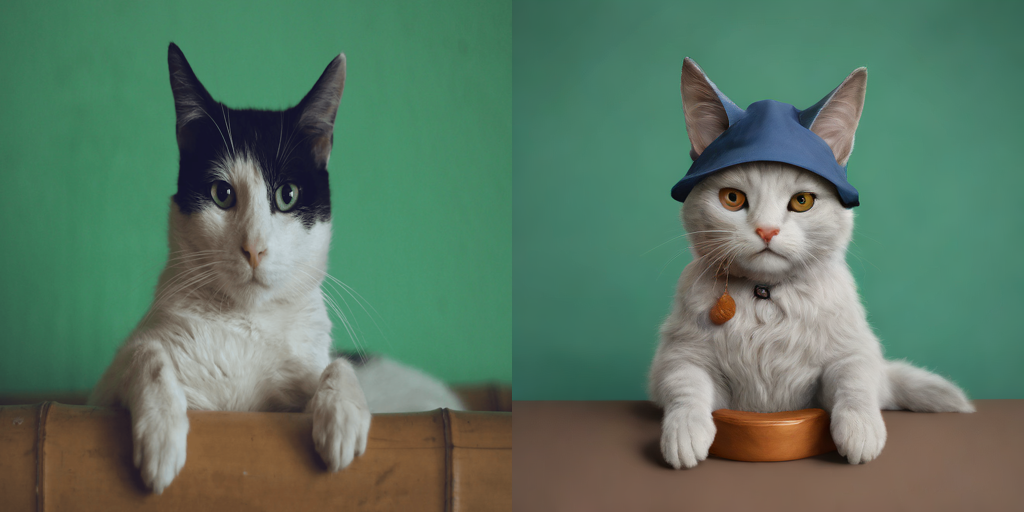

In [7]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

# use from_pipe to avoid consuming additional memory when loading a checkpoint
pipeline_image2image = AutoPipelineForImage2Image.from_pipe(pipeline_text2image).to("cuda")

init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png")
init_image = init_image.resize((512, 512))

prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"

image = pipeline_image2image(prompt, image=init_image, strength=0.5, guidance_scale=0.0, num_inference_steps=2).images[0]
make_image_grid([init_image, image], rows=1, cols=2)